# What is Image Compression with the Single Value Decomposition (SVD)

## Introduction

### Image compression is all about reducing the size of an image without losing too much quality. Singular Value Decomposition (SVD) is a powerful mathematical method for doing this. SVD is a matrix factorization technique that breaks down a matrix into three simpler matrices. When used on images (which are just matrices of pixel values), it allows you to keep only the most important information and remove the rest, leading to smaller file sizes with little visual difference.

## How does Image Compression with SVD work?

### SVD decomposes any matrix *A* into three matrices:
*A* = *U*$\sum$$V^T$
*   *U*: left singular vectors (orthogonal matrix)
*   $\sum$: diagonal matrix of singular values
*   $V^T$: right singular vectors (transpose of orthogonal matrix)

### The singular values in $\sum$ represent the “strength” or “importance” of each feature in the data. In image compression, we can keep only the top *k* singular values (and corresponding vectors in *U* and $V^T$) to approximate the original image with much less data.


## Image Compression with SVD

### To compress an image using SVD:

1.   Convert the image to grayscale (optional but common for simplicity)
2.   Treat the image as a matrix of pixel values
3.   Apply SVD to get *U*, $\sum$, and $V^T$
4.   Choose a value *k* (less than the original matrix size)
5.   Reconstruct the image using only the top k singular values/vectors
6.   The result is a compressed image that closely resembles the original

### The higher the *k*, the closer the image will be to the original, but the file size will also be larger. The trick is to find a balance between quality and compression.


## Advantages and Limitations

### Advantages

*   Significant reduction in storage size
*   Easy to implement with linear algebra libraries like NumPy
*   Good visual quality with relatively small k

### Limitations

*   Compression works best with grayscale or simple images
*   Computationally heavy for very large images or real-time use
*   Works with matrix-based data, not ideal for all kinds of images

# Image Compression with SVD in Action

Saving Screen Shot 2025-05-04 at 9.23.53 PM.png to Screen Shot 2025-05-04 at 9.23.53 PM.png
Total number of singular values: 636


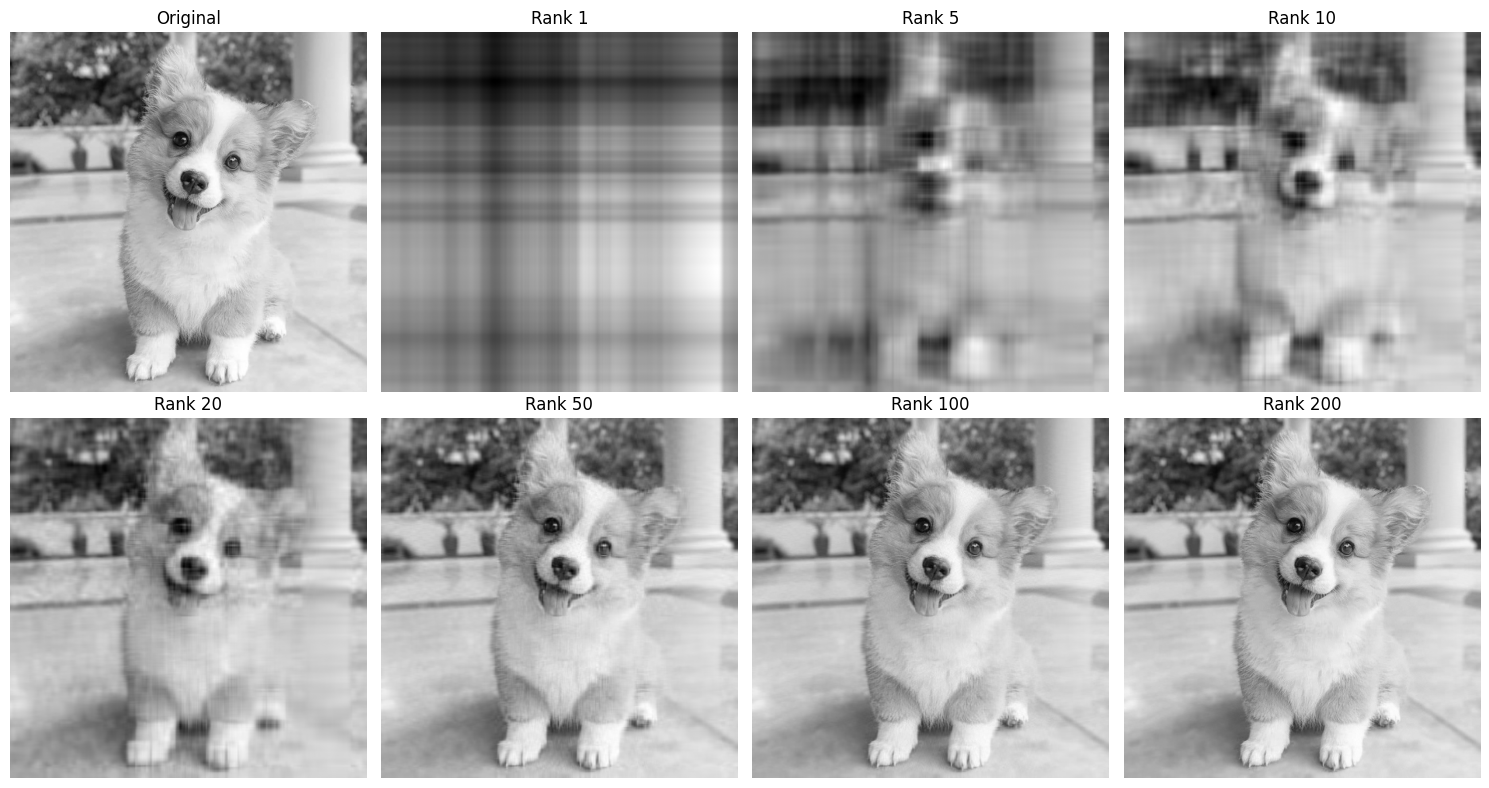

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from google.colab import files
import io

def svd_compression(image_path, ranks = [1, 5, 10, 20, 50, 100, 200]):
    img = Image.open(image_path).convert('L')
    img = np.array(img)

    U, S, Vt = np.linalg.svd(img, full_matrices = False)

    print(f"Total number of singular values: {len(S)}")

    plt.figure(figsize = (15, 8))
    plt.subplot(2, len(ranks)//2 + 1, 1)
    plt.imshow(img, cmap = 'gray')
    plt.title("Original")
    plt.axis("off")

    for i, r in enumerate(ranks):
        compressed = np.dot(U[:, :r], np.dot(np.diag(S[:r]), Vt[:r, :]))
        plt.subplot(2, len(ranks)//2 + 1, i+2)
        plt.imshow(compressed, cmap = 'gray')
        plt.title(f"Rank {r}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

svd_compression("/Users/maciek/Desktop/Screen Shot 2025-05-04 at 9.23.53 PM")

### The images above show the outputs of performing SVD image compression when utilziing different number of  𝜎  terms. The rank 1 image doesn't have a lot of detail, but at rank 5, there are some vague outlines of the face of the dog. At rank 10, it is very clear that the image is of a dog and at rank 20, the image just appears as a low resolution image.

### The amount of new information added from rank 1 to rank 10 is substantial as the addition of 9 more terms allows for easy identification of the image. With each additional term, the improvement seems to diminish, but the image does appear to get better as it approaches the full resolution non-compressed image.